In [156]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math
from sympy import symbols, Eq, solve


Vi opstiller modellen med lignigerne: 
$$ IS: \hspace{2cm} y_t - \overline{y} = \alpha_1(g-\overline{g}) - \alpha_2(r-\overline{r}) - \alpha_3(\tau - \overline{\tau}) $$
$$ MP: \hspace{2cm} i_t^p = \pi_{t+1}^e + \overline{r} + h(y-\overline{y}) + b(\pi - \pi^*) $$
$$ AS: \hspace{2cm} y_t - \overline{y} = \gamma(\pi - \pi^*)$$
$$ IE: \hspace{2cm} \pi^e_{t+1} = \pi_t $$


In [163]:
#Definerer eksogene variable:
alpha1 = 1
alpha2 = 1
alpha3 = 1
v = 0
gamma = 1.5
h = 0.5
b = 0.5
tau = 1
taubar = 1
g = 1
gbar = 1
ybar = 100
pibar = 100
pi_exp = pibar


#Definerer tidsserien:
data = pd.DataFrame()
data['tid'] = range(0,50)



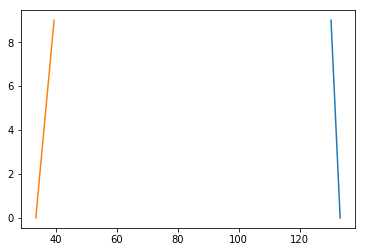

In [164]:
#Opstiller selve modellen:

def AS(ybar,pi,pi_exp,gamma):
    y = ybar + (1/gamma)*(pi-pi_exp)
    return y

def AD(ybar,pi,pibar,alpha1,g,gbar,alpha2,alpha3,h,b,tau,taubar):
    y = ybar + (alpha1/(1+alpha2*h))*(g-gbar) -(alpha2*b/(1+alpha2*h))*(pi-pibar) -(alpha3/(1+alpha2*h))*(tau-taubar) + (1/(1+alpha2*h))*v
    return y



AS_liste = []
for i in range(0,10):
    AS_liste.append(AS(ybar,i,pi_exp,gamma))

AD_liste = []
for i in range(0,10):
    AD_liste.append(AD(ybar,i,pibar,alpha1,g,gbar,alpha2,alpha3,h,b,tau,taubar))



figure = plt.figure()
plt.plot(AD_liste, range(0,10))
plt.plot(AS_liste, range(0,10))

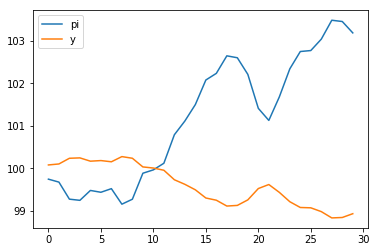

In [169]:
#Finder equilibrium:

y_løsninger = []
pi_løsninger = []
v_vektor = [0]

for i in range(1,30):
    s = np.random.normal(loc=0, scale=0.5, size=None)
    v_vektor.append(
            v_vektor[i-1] + s
            )


for i in v_vektor:
    pi, y = symbols('pi y')
    eq1 = Eq(ybar + (1/gamma)*(pi-pi_exp) + i/gamma - y)
    eq2 = Eq(ybar + (alpha1/(1+alpha2*h))*(g-gbar) -(alpha2*b/(1+alpha2*h))*(pi-pibar) -(alpha3/(1+alpha2*h))*(tau-taubar) + (1/(1+alpha2*h)*0 - y))

    løsning = solve((eq1,eq2), (pi,y))
    pi_løsninger.append(løsning[pi])
    y_løsninger.append(løsning[y])
    pi_exp = løsning[pi]

data['y_løs'] = pd.DataFrame(y_løsninger)
data['pi_løs'] = pd.DataFrame(pi_løsninger)


plt.plot(pi_løsninger, label = 'pi')
plt.plot(y_løsninger, label = 'y')
plt.legend()


In [166]:
pi, y = symbols('pi y')
eq1 = Eq(ybar + (1/gamma)*(pi-pi_exp) - y)
eq2 = Eq(ybar + (alpha1/(1+alpha2*h))*(g-gbar) -(alpha2*b/(1+alpha2*h))*(pi-pibar) -(alpha3/(1+alpha2*h))*(tau-taubar) + (1/(1+alpha2*h)*v - y))
pi_exp = løsning[pi]

løsning = solve((eq1,eq2), (pi,y))
løsning[pi]
løsning[y]

100.469456143953